<a href="https://colab.research.google.com/github/kadamvd/data_cere_ries/blob/master/LAO_BAND_R_KV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BAND visualization (Reading)**
 (1) install and load packages

 (2) Data upload (Download Data: https://docs.google.com/spreadsheets/d/1Y3u7kXI6vPs8gzZvUOMHm-GMCk_aicdK/edit?usp=sharing&ouid=110404411823733054417&rtpof=true&sd=true)

 (3) Data open

 (4) Exploring data structures

 (5) Select variable(Math band)

 (6) Data pre-processing

 (7) Visualization

In [ ]:
# (1) install and load packages
install.packages("descr")
library(descr)
library(readxl)
library(dplyr)
library(tibble)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# (2) Data upload - Drag & Drop the downloaded data into the file field

# (3) Data open
data <- read_excel("/content/LAO_BAND KV.xlsx")

In [ ]:
# (4) Exploring data structures
head(data)

Fullid,S_GENDER,PL_PV1_M,PL_PV1_R,PL_PV1_W
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
LAO0100101001,1,5,3,1
LAO0100101002,1,2,2,1
LAO0100101003,1,2,3,0
LAO0100101004,1,4,3,2
LAO0100101005,1,4,2,1
LAO0100101006,1,6,4,2


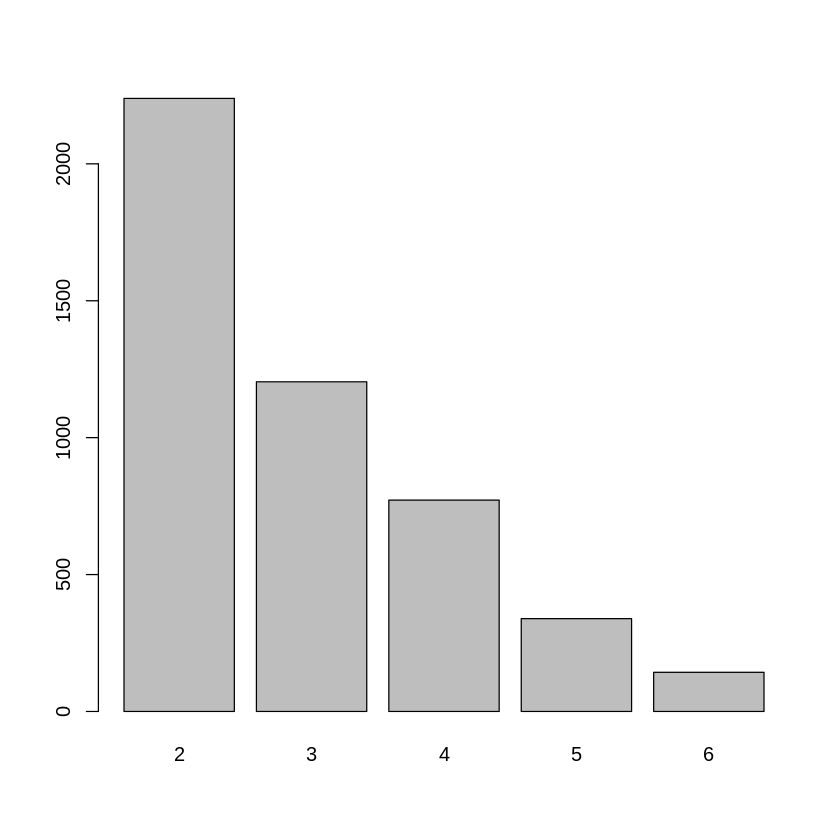

In [ ]:
# (5) Select variable(Reading band)
reading <- freq(data$PL_PV1_R)

In [ ]:
reading

,Frequency,Percent
2,2239,47.668725
3,1204,25.633383
4,772,16.436023
5,339,7.217373
6,143,3.044496
Total,4697,100.000000


In [ ]:
# (6) Data pre-processing
#delete row "Total"
reading <- reading[!(row.names(reading) %in% "Total"),]

In [ ]:
reading

,Frequency,Percent
2,2239,47.668725
3,1204,25.633383
4,772,16.436023
5,339,7.217373
6,143,3.044496


In [ ]:
#convert to dataframe
reading <- data.frame(reading)

In [ ]:
#rowname to column
reading <- rownames_to_column(reading)
reading

rowname,Frequency,Percent
<chr>,<dbl>,<dbl>
2,2239,47.668725
3,1204,25.633383
4,772,16.436023
5,339,7.217373
6,143,3.044496


In [ ]:
#limiting decimals
reading$Percent <- round(reading$Percent, 1)
reading

rowname,Frequency,Percent
<chr>,<dbl>,<dbl>
2,2239,47.7
3,1204,25.6
4,772,16.4
5,339,7.2
6,143,3.0


In [ ]:
# reorder rows
reading$rowname <- factor(reading$rowname, levels=c('6', '5', '4', '3', '2'))
reading

rowname,Frequency,Percent
<fct>,<dbl>,<dbl>
2,2239,47.7
3,1204,25.6
4,772,16.4
5,339,7.2
6,143,3.0


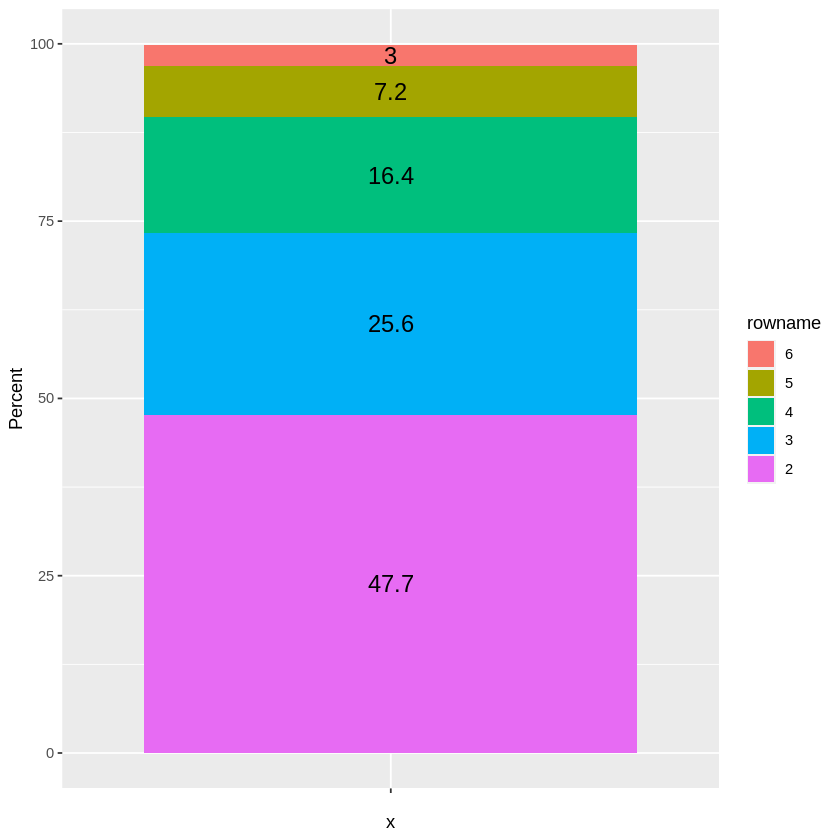

In [ ]:
# (7) Visualization
ggplot(reading, aes(x = "", y =Percent   , fill=rowname, label =Percent   )) +
       geom_bar(stat="identity") +
       geom_text(size=5, position = position_stack(vjust = 0.5))